In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

     |████████████████████████████████| 69 kB 3.6 MB/s 


In [2]:
!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 248 kB 5.2 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 10.1 MB 49.7 MB/s 
     |████████████████████████████████| 675 kB 67.3 MB/s 
     |████████████████████████████████| 636 kB 61.2 MB/s 
     |████████████████████████████████| 102 kB 73.4 MB/s 
     |████████████████████████████████| 3.1 MB 20.4 MB/s 
     |████████████████████████████████| 812 kB 44.7 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#-------------------------------------------------------------------------------------------------------------------------------
import phik                                                         # Importing phiK lib
from phik import resources, report
#-------------------------------------------------------------------------------------------------------------------------------
import math
import re

#-------------------------------------------------------------------------------------------------------------------------------
from numpy import * 
import string

#--------------------------------------------------------------------------------------------------------------------------------

from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------



In [4]:
churn_train = pd.read_csv('Churn_train.csv',skipinitialspace=True)

In [5]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [6]:
churn_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.00000,5634.00000,5634.00000,5626.00000
mean,0.16187,32.27796,64.77913,2280.66238
std,0.36837,24.55521,30.10499,2266.39462
min,0.00000,0.00000,18.25000,18.80000
25%,0.00000,9.00000,35.40000,391.90000
50%,0.00000,29.00000,70.37500,1394.80000
75%,0.00000,55.00000,89.85000,3794.48750
max,1.00000,72.00000,118.65000,8684.80000


In [7]:
churn_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35000,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55000,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75000,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85000,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75000,No


In [8]:
profile = ProfileReport(churn_train, explorative = True)
profile.to_file("output_pre.html")

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Total charges** has **8** missing values

In [9]:
##identify column names which have null values
churn_train.columns[churn_train.isnull().any()].tolist()

['TotalCharges']

In [10]:
is_NaN = churn_train.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = churn_train[row_has_NaN]
rows_with_NaN

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
899,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35000,nan,No
2224,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85000,nan,No
2697,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75000,nan,No
3054,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70000,nan,No
3488,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90000,nan,No
4056,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55000,nan,No
4761,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05000,nan,No
5607,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25000,nan,No


**It will not be possible to fill these missing values as tenure is also ZERO**

In [11]:
#Replacing missing value rows with ZERO
churn_train['TotalCharges'] = churn_train['TotalCharges'].fillna(0)

In [12]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


No     4113
Yes    1521
Name: Churn, dtype: int64

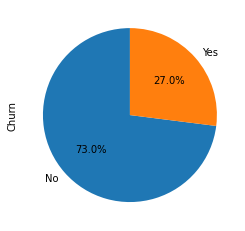

In [13]:
churn_train.Churn.value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90);
churn_train.Churn.value_counts()

**Churn of 27% is observed**

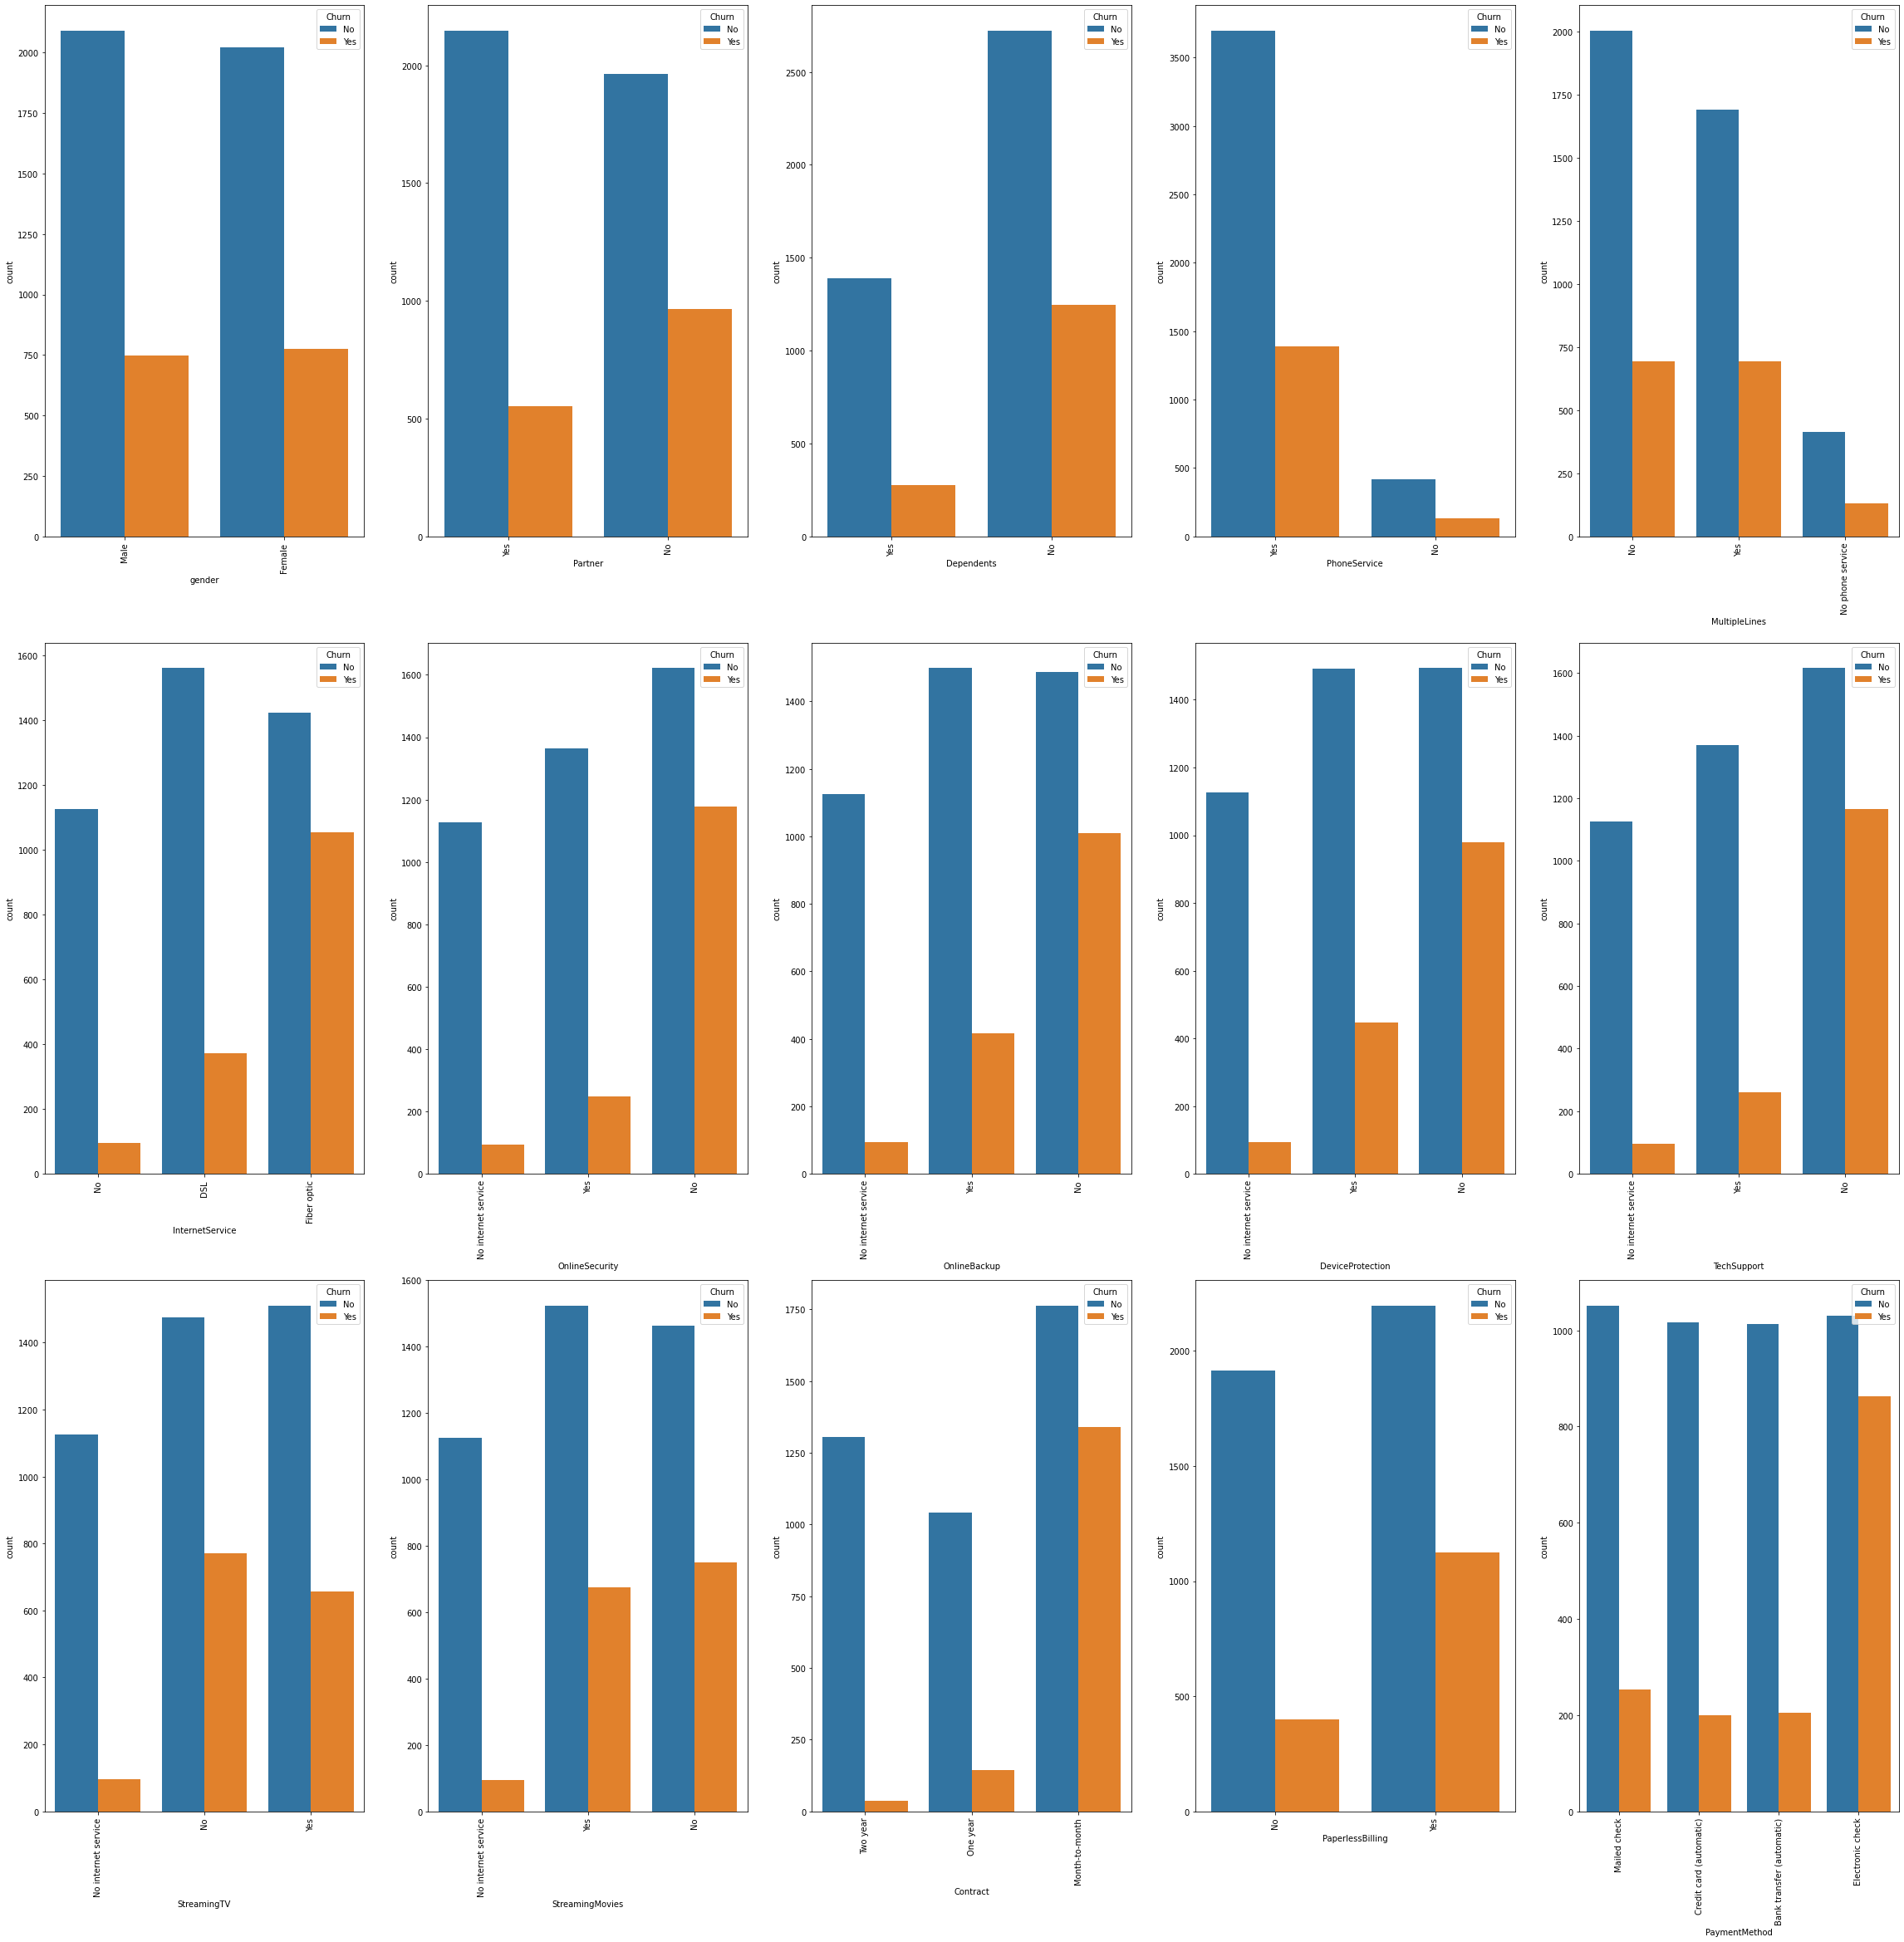

In [14]:
fig, ax = plt.subplots(3, 5, figsize=(40,40))
categorical = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for variable, subplot in zip(categorical, ax.flatten()):
    g= sns.countplot(churn_train[variable],hue=churn_train['Churn'], ax=subplot)
    for label in subplot.get_xticklabels():
      label.set_rotation(90)

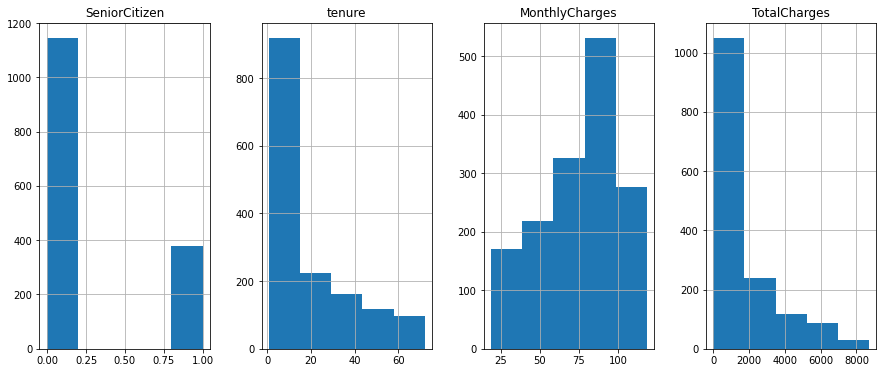

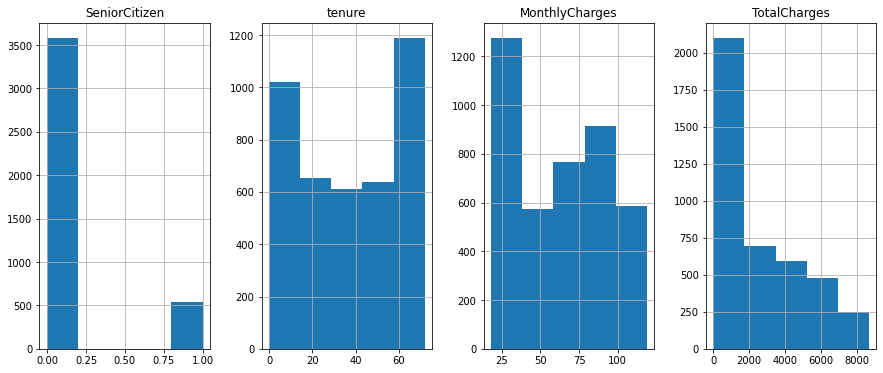

In [16]:
numerical = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
churn_train_yes = churn_train[churn_train['Churn']=='Yes']
churn_train_no = churn_train[churn_train['Churn']=='No']
churn_train_yes[numerical].hist(bins=5, figsize=(15, 6), layout=(1, 4));
churn_train_no[numerical].hist(bins=5, figsize=(15, 6), layout=(1, 4));



**Almost 50% of senior citizen has churned their connection**

** Churn decreases significantly beyond tenure of 20**

**Churn increases significantly beyond monthly charges of 60**

**Gender has NO impact on churn**

**Presence of partner, dependents kind of decreases churn**

**Having no internet service reduces churn signficantly**. **Fibre Optic customers are highly likely to switch over**

**Online security, online backup, Device Protection, Tech Support,  reduces the likelihood of churn**

**Streaming Services have no impact on reduction of churn**

**Having 2 year contract/one year contract reduces churn significantly**

**Higher churn observed for paperless billing**

**Payment through mailed check, credit card, bank transfer** **reduces churn** whereas **very high churn observed for electronic check**



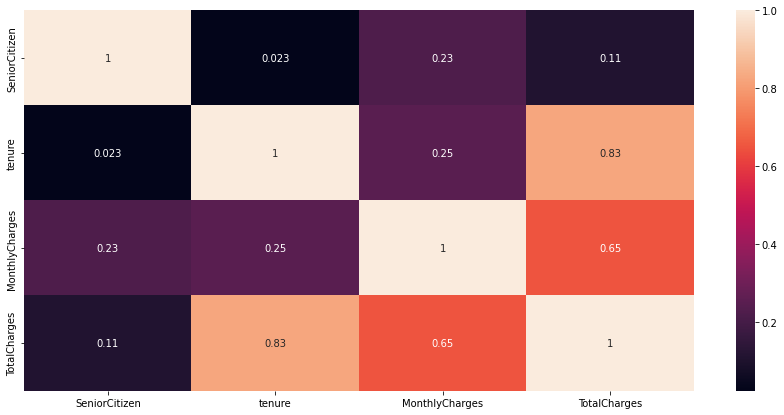

In [17]:
figure = plt.figure(figsize=[15,7])
sns.heatmap(churn_train.corr(), annot = True)

interval columns not set, guessing: ['tenure', 'MonthlyCharges', 'TotalCharges']


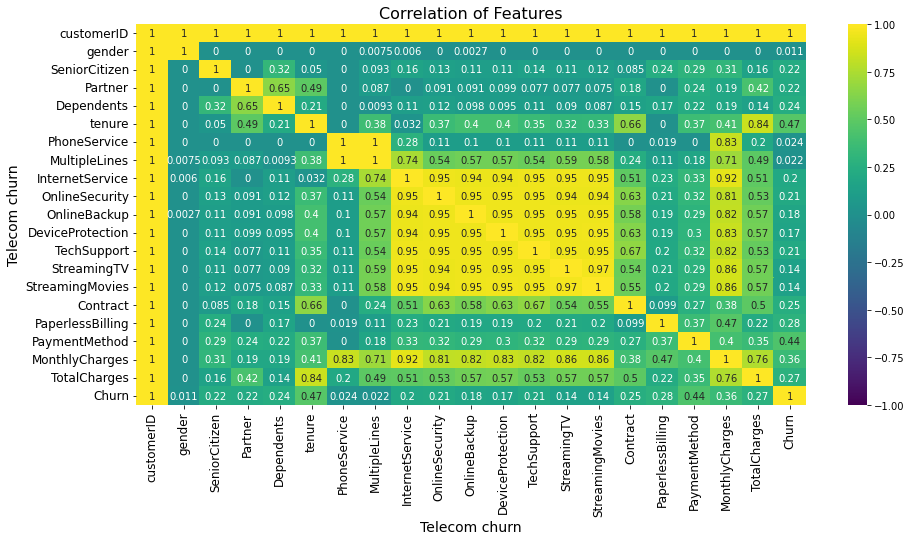

In [ ]:
# Preliminary check on co-relation between the variables
phi_k_corr = churn_train.phik_matrix()
phi_k_corr

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of seaborn's heatmap() function
sns.heatmap(data=phi_k_corr, annot=True, cmap='viridis',vmin=-1, vmax=1, center=0)

# Changing x-ticks label size to 12
plt.xticks(size=12, rotation=90)

# Changing y-ticks label size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Telecom churn', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Telecom churn', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Correlation of Features', size=16)


# Dispaly the output by rendering visual on the screen
plt.show()

**Dependent and partners have high co-relation**. We will **drop partners**

**Total charges and contract have high co-relation with tenure**, We will drop them



In [18]:
churn_train['TotalCharges'] = churn_train['TotalCharges'].astype(float)

#Checking Multicollinearity

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)
churn_train_num = churn_train.select_dtypes(include=['int64','float64'])
churn_train_num.head()
y = churn_train_num.iloc[:,:-1]
calc_vif(y)


,variables,VIF
0,SeniorCitizen,1.25838
1,tenure,2.61873
2,MonthlyCharges,2.92491


In [19]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [20]:
#Dropping some variables
churn_train.drop(['customerID','TotalCharges','Partner'],axis=1,inplace=True)
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Dependents        5634 non-null   object 
 3   tenure            5634 non-null   int64  
 4   PhoneService      5634 non-null   object 
 5   MultipleLines     5634 non-null   object 
 6   InternetService   5634 non-null   object 
 7   OnlineSecurity    5634 non-null   object 
 8   OnlineBackup      5634 non-null   object 
 9   DeviceProtection  5634 non-null   object 
 10  TechSupport       5634 non-null   object 
 11  StreamingTV       5634 non-null   object 
 12  StreamingMovies   5634 non-null   object 
 13  Contract          5634 non-null   object 
 14  PaperlessBilling  5634 non-null   object 
 15  PaymentMethod     5634 non-null   object 
 16  MonthlyCharges    5634 non-null   float64


In [21]:
#Converting Churn into 0 and 1 for better handling purpose
churn_train.Churn.replace({"Yes":1, "No":0}, inplace = True)
churn_train.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Male,0,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,0
1,Female,0,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,1
2,Male,0,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,0
3,Male,0,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,0
4,Male,0,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,0


In [ ]:
#churn_train.set_index('customerID', inplace = True)
#churn_train.reset_index(inplace = True)

**ONEHOT ENCODING**

In [22]:
encoded_data=pd.get_dummies(churn_train)
encoded_data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,12,19.70000,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
1,0,42,73.90000,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0
2,0,71,65.15000,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0
3,0,71,85.45000,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
4,0,30,70.40000,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0


In [23]:
encoded_data=pd.get_dummies(churn_train,drop_first=True)
encoded_data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,12,19.70000,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
1,0,42,73.90000,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
2,0,71,65.15000,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,71,85.45000,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0
4,0,30,70.40000,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [24]:
encoded_data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'gender_Male',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
target = ['Churn']

In [28]:
#Define X and y
X = encoded_data[features]
y = encoded_data[target]

In [29]:
#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [30]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (4507, 28) (4507, 1)
Testing Data Shape: (1127, 28) (1127, 1)


In [31]:
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logreg = LogisticRegression(solver='liblinear') #This occurs due to a recent change in the sklearn package. You can also use solver='sag' as well.
# Fit the model to our X and y training sets
logreg.fit(X_train,y_train);

In [32]:
#Now that our model is built, we must predict our future values
#Predicting on Train data
y_pred_train = logreg.predict(X_train)
y_pred_train

array([0, 1, 1, ..., 1, 0, 1])

In [33]:
#Predicting on Test data
y_pred_test=logreg.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 0])

In [34]:
#Checking probability of Churn and Retention in Test Data
probabilities = logreg.predict_proba(X_test)
probabilities

array([[0.99106096, 0.00893904],
       [0.82171834, 0.17828166],
       [0.81450382, 0.18549618],
       ...,
       [0.93692528, 0.06307472],
       [0.42208204, 0.57791796],
       [0.68874843, 0.31125157]])

In [35]:
#Probability of Churn
probabilities_1=probabilities[:,1]
probabilities_1

array([0.00893904, 0.17828166, 0.18549618, ..., 0.06307472, 0.57791796,
       0.31125157])

In [36]:
len(probabilities_1)

1127

In [37]:
#Probability of Retention
probabilities_0=probabilities[:,0]
probabilities_0

array([0.99106096, 0.82171834, 0.81450382, ..., 0.93692528, 0.42208204,
       0.68874843])

In [38]:
len(probabilities_0)

1127

In [39]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5244,0,71,70.85000,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0
3194,0,1,20.75000,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1
2107,0,1,20.35000,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1
3847,0,2,75.70000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
566,0,1,19.90000,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0


In [40]:
test_predictions = X_test.copy()
test_predictions['actual'] = y_test   ## updating the actual churn data into test_predictions
test_predictions['predicted'] = y_pred_test
test_predictions.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,actual,predicted
5244,0,71,70.85000,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0
3194,0,1,20.75000,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
2107,0,1,20.35000,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
3847,0,2,75.70000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
566,0,1,19.90000,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0


In [41]:
#Updating probability of churn
test_predictions['probability']=probabilities_1
test_predictions.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,actual,predicted,probability
5244,0,71,70.85000,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0.00894
3194,0,1,20.75000,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0.17828
2107,0,1,20.35000,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0.18550
3847,0,2,75.70000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0.58003
566,0,1,19.90000,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0.17744


In [42]:
#calculating accuracy score for test
accuracy_score(y_test,y_pred_test)

0.8074534161490683

In [43]:
test_predictions[test_predictions.actual==1].count()

SeniorCitizen                            313
tenure                                   313
MonthlyCharges                           313
gender_Male                              313
Dependents_Yes                           313
PhoneService_Yes                         313
MultipleLines_No phone service           313
MultipleLines_Yes                        313
InternetService_Fiber optic              313
InternetService_No                       313
OnlineSecurity_No internet service       313
OnlineSecurity_Yes                       313
OnlineBackup_No internet service         313
OnlineBackup_Yes                         313
DeviceProtection_No internet service     313
DeviceProtection_Yes                     313
TechSupport_No internet service          313
TechSupport_Yes                          313
StreamingTV_No internet service          313
StreamingTV_Yes                          313
StreamingMovies_No internet service      313
StreamingMovies_Yes                      313
Contract_O

In [44]:
test_predictions[test_predictions.predicted==1].count()

SeniorCitizen                            252
tenure                                   252
MonthlyCharges                           252
gender_Male                              252
Dependents_Yes                           252
PhoneService_Yes                         252
MultipleLines_No phone service           252
MultipleLines_Yes                        252
InternetService_Fiber optic              252
InternetService_No                       252
OnlineSecurity_No internet service       252
OnlineSecurity_Yes                       252
OnlineBackup_No internet service         252
OnlineBackup_Yes                         252
DeviceProtection_No internet service     252
DeviceProtection_Yes                     252
TechSupport_No internet service          252
TechSupport_Yes                          252
StreamingTV_No internet service          252
StreamingTV_Yes                          252
StreamingMovies_No internet service      252
StreamingMovies_Yes                      252
Contract_O

In [45]:
test_predictions[test_predictions.actual==0].count()

SeniorCitizen                            814
tenure                                   814
MonthlyCharges                           814
gender_Male                              814
Dependents_Yes                           814
PhoneService_Yes                         814
MultipleLines_No phone service           814
MultipleLines_Yes                        814
InternetService_Fiber optic              814
InternetService_No                       814
OnlineSecurity_No internet service       814
OnlineSecurity_Yes                       814
OnlineBackup_No internet service         814
OnlineBackup_Yes                         814
DeviceProtection_No internet service     814
DeviceProtection_Yes                     814
TechSupport_No internet service          814
TechSupport_Yes                          814
StreamingTV_No internet service          814
StreamingTV_Yes                          814
StreamingMovies_No internet service      814
StreamingMovies_Yes                      814
Contract_O

In [46]:
test_predictions[test_predictions.predicted==0].count()

SeniorCitizen                            875
tenure                                   875
MonthlyCharges                           875
gender_Male                              875
Dependents_Yes                           875
PhoneService_Yes                         875
MultipleLines_No phone service           875
MultipleLines_Yes                        875
InternetService_Fiber optic              875
InternetService_No                       875
OnlineSecurity_No internet service       875
OnlineSecurity_Yes                       875
OnlineBackup_No internet service         875
OnlineBackup_Yes                         875
DeviceProtection_No internet service     875
DeviceProtection_Yes                     875
TechSupport_No internet service          875
TechSupport_Yes                          875
StreamingTV_No internet service          875
StreamingTV_Yes                          875
StreamingMovies_No internet service      875
StreamingMovies_Yes                      875
Contract_O

In [47]:
churn_test = pd.read_csv('Churn_test.csv',skipinitialspace=True)

In [48]:
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [49]:
churn_test_cust = churn_test['customerID']

In [50]:
churn_test.drop(['customerID','TotalCharges','Partner'],axis=1,inplace=True)
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1409 non-null   object 
 1   SeniorCitizen     1409 non-null   int64  
 2   Dependents        1409 non-null   object 
 3   tenure            1409 non-null   int64  
 4   PhoneService      1409 non-null   object 
 5   MultipleLines     1409 non-null   object 
 6   InternetService   1409 non-null   object 
 7   OnlineSecurity    1409 non-null   object 
 8   OnlineBackup      1409 non-null   object 
 9   DeviceProtection  1409 non-null   object 
 10  TechSupport       1409 non-null   object 
 11  StreamingTV       1409 non-null   object 
 12  StreamingMovies   1409 non-null   object 
 13  Contract          1409 non-null   object 
 14  PaperlessBilling  1409 non-null   object 
 15  PaymentMethod     1409 non-null   object 
 16  MonthlyCharges    1409 non-null   float64


In [52]:
encoded_data_test=pd.get_dummies(churn_test,drop_first=True)
encoded_data_test.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,41,79.85000,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0
1,1,66,102.40000,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0
2,0,12,45.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,5,50.60000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,10,65.90000,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1


In [53]:
churn_test_churn = logreg.predict(encoded_data_test)

In [55]:
churn_test['predicted'] = churn_test_churn
churn_test['customerID']= churn_test_cust
churn_test.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,predicted,customerID
0,Female,0,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85000,0,8879-ZKJOF
1,Female,1,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40000,0,0201-MIBOL
2,Female,0,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00000,0,1600-DILPE
3,Female,0,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60000,0,8601-QACRS
4,Female,0,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90000,0,7919-ZODZZ


In [56]:
churn_test.predicted.value_counts()

0    1085
1     324
Name: predicted, dtype: int64

In [63]:
final_pred = churn_test[['customerID','predicted']]
final_pred.head()

,customerID,predicted
0,8879-ZKJOF,0
1,0201-MIBOL,0
2,1600-DILPE,0
3,8601-QACRS,0
4,7919-ZODZZ,0


In [67]:
#Converting Churn back to Yes and No
final_pred.predicted.replace({1:"Yes", 0:"No"}, inplace = True)
final_pred.head()
final_pred.predicted.value_counts()

No     1085
Yes     324
Name: predicted, dtype: int64

In [68]:
final_pred.to_csv('submission.csv', header=False, index=False)